In [1]:
import pandas as pd

In [2]:
# words_cues = ['cities','hole','sitting','fort', 'table', 'clean','degree','novel', 'year', 'fall']
# # words_targets = ['runs', 'tree', 'quiet', 'cold', 'once', 'door', 'rock','risk', 'hill', 'pair']
# words_targets = ['moon', 'things', 'turned', 'projects', 'approach', 
#                  'love', 'region','program', 'explain', 'aside']

In [3]:
# test_cue = pd.read_csv("C:/Users/ANUSKA MAITY/Downloads/Final_to_plot (1).csv")
# test_target = pd.read_csv("C:/Users/ANUSKA MAITY/Downloads/Final_to_plot_Target_data.csv")

# test_cue = test_cue[test_cue['Global Similarity'].notna()]

cox = pd.read_excel("C:/Users/ANUSKA MAITY/Downloads/Cox Data Mem Combined.xlsx")

In [4]:
# words_to_remove = ['advice', 'beach', 'beat', 'camp', 'chain', 'council', 'factor', 'fellow', 'file', 'film', 
#                   'impact', 'plane', 'pool', 'scene', 'signal', 'spirit', 'stress', 'truck', 'uniform', 'volume', 
#                   'wheel', 'youth']

# test_cue = test_cue[~test_cue['Cue'].isin(words_to_remove)]

In [5]:
# words_to_remove = ['beat', 'beauty', 'belief', 'bridge', 'brief', 'campaign', 'capacity', 'coffee', 
#                    'column', 'council', 'dance', 'device', 'extreme', 'factor', 'favor', 'fellow', 
#                    'frame', 'impact', 'item', 'pool', 'reduce', 'staff', 'universe', 'worry', 'youth']
# test_target = test_target[~test_target['Target'].isin(words_to_remove)]

In [6]:
words = cox['Word'].unique()

In [7]:
subtlex = pd.read_excel("C:/Users/ANUSKA MAITY/Downloads/DataSets/SUBTLEXusExcel2007.xlsx")
# Create lists to store frequency and contextual diversity counts
wf = []
cd = []
# freq_targets = []
# cd_targets = []

# Get counts for cue words
for word in words:
    word_data = subtlex[subtlex['Word'] == word]
    wf.append(word_data['FREQcount'].values[0] if not word_data.empty else 0)
    cd.append(word_data['CDcount'].values[0] if not word_data.empty else 0)

# # Get counts for target words  
# for word in words_targets:
#     word_data = subtlex[subtlex['Word'] == word]
#     freq_targets.append(word_data['FREQcount'].values[0] if not word_data.empty else 0)
#     cd_targets.append(word_data['CDcount'].values[0] if not word_data.empty else 0)

In [8]:
# Create dataframes for cues and targets
df = pd.DataFrame({
    'Word': words,
    'Frequency': wf,
    'CD': cd
})

# targets_df = pd.DataFrame({
#     'Word': words_targets,
#     'Frequency': freq_targets,
#     'CD': cd_targets
# })

In [12]:
conc = pd.read_excel("C:/Users/ANUSKA MAITY/Downloads/DataSets/Concreteness dataset.xlsx")

In [13]:
# Get concreteness values for cues
conc_scores = []
for word in words:
    word_data = conc[conc['Word'] == word]
    conc_scores.append(word_data['Conc.M'].values[0] if not word_data.empty else None)

# # Get concreteness values for targets
# conc_targets = []
# for word in words_targets:
#     word_data = conc[conc['Word'] == word]
#     conc_targets.append(word_data['Conc.M'].values[0] if not word_data.empty else None)

# Add concreteness values to dataframes
df['Concreteness'] = conc_scores
# targets_df['Concreteness'] = conc_targets

In [14]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import cmudict
from nltk.stem import WordNetLemmatizer
from nltk.metrics import edit_distance
from collections import defaultdict
import pandas as pd

# Download necessary resources
nltk.download('wordnet')
nltk.download('cmudict')

# Load CMU Pronouncing Dictionary
cmu = cmudict.dict()

# Function to count morphemes
def count_morphemes(word):
    base_form = wn.morphy(word)
    return len(base_form) if base_form is not None else 0

# Function to count phonemes
def count_phonemes(word):
    return len(cmu[word][0]) if word in cmu else 0

# Function to calculate orthographic neighborhood (ON) size
def orthographic_neighborhood(word):
    synsets = wn.synsets(word)
    lemmas = set()
    for synset in synsets:
        lemmas.update(synset.lemma_names())
    return len(lemmas)

# Function to calculate phonological neighborhood (PN) size
def phonological_neighborhood(word):
    phonemes = cmu[word][0] if word in cmu else []
    neighbors = set()
    for w, pronunciations in cmu.items():
        for pron in pronunciations:
            if edit_distance(pron, phonemes) == 1:
                neighbors.add(w)
    return len(neighbors)

[nltk_data] Downloading package wordnet to C:\Users\ANUSKA
[nltk_data]     MAITY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package cmudict to C:\Users\ANUSKA
[nltk_data]     MAITY\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [15]:
# Calculate metrics for cues
morphemes_cues = [count_morphemes(word) for word in words]
phonemes_cues = [count_phonemes(word) for word in words]
on_cues = [orthographic_neighborhood(word) for word in words]
pn_cues = [phonological_neighborhood(word) for word in words]

# # Calculate metrics for targets  
# morphemes_targets = [count_morphemes(word) for word in words_targets]
# phonemes_targets = [count_phonemes(word) for word in words_targets]
# on_targets = [orthographic_neighborhood(word) for word in words_targets]
# pn_targets = [phonological_neighborhood(word) for word in words_targets]

# Add metrics to dataframes
df['Morphemes'] = morphemes_cues
df['Phonemes'] = phonemes_cues
df['ON_Size'] = on_cues
df['PN_Size'] = pn_cues

# targets_df['Morphemes'] = morphemes_targets
# targets_df['Phonemes'] = phonemes_targets
# targets_df['ON_Size'] = on_targets
# targets_df['PN_Size'] = pn_targets

In [16]:
from nltk.corpus import cmudict

# Load CMU Pronouncing Dictionary
cmu = cmudict.dict()

def count_syllables(word):
    return len(cmu[word][0]) if word in cmu else 0

In [17]:
# Add letter counts
df['Letters'] = df['Word'].apply(len)
# targets_df['Letters'] = targets_df['Word'].apply(len)

# Add syllable counts
df['Syllables'] = df['Word'].apply(count_syllables)
# targets_df['Syllables'] = targets_df['Word'].apply(count_syllables)


In [18]:
df

,Word,Frequency,CD,Concreteness,Morphemes,Phonemes,ON_Size,PN_Size,Letters,Syllables
0,accident,4146,2180,3.26,8,8,4,3,8,8
1,accounts,534,391,NaN,7,6,17,4,8,6
2,accurate,400,344,1.90,8,6,3,3,8,6
3,achieve,374,317,2.29,7,4,4,6,7,4
4,acid,508,323,4.25,4,4,25,9,4,4
...,...,...,...,...,...,...,...,...,...,...
919,writers,303,195,NaN,6,5,2,29,7,5
920,yards,760,497,NaN,4,5,16,13,5,5
921,yelled,313,278,NaN,4,4,11,16,6,4
922,younger,1257,944,2.79,7,5,10,8,7,5


In [19]:
df_cleaned = df.dropna()

In [20]:
len(df_cleaned)

716

In [21]:
# Check if any column has NaN values
nan_check = df_cleaned.isna().any()

# Display columns with NaNs (if any)
print("Columns with NaN values:" if nan_check.any() else "✅ No NaN values found in any column.")
print(nan_check[nan_check])  # Only prints columns where NaNs are present


✅ No NaN values found in any column.
Series([], dtype: bool)


In [35]:
boi_means = pd.read_csv("C:/Users/ANUSKA MAITY/Downloads/DataSets/BOI means.csv")

In [36]:
df_cleaned = df_cleaned.merge(boi_means[['Word', 'Mean']], on='Word', how='left')
df_cleaned.rename(columns={'Mean': 'BOI'}, inplace=True)


In [37]:
df_cleaned = df_cleaned.dropna()

In [38]:
merged_df = pd.merge(df_cleaned, cox[['Word', 'Cue Memorability', 'Target Memorability']], on='Word', how='inner')

In [39]:
merged_df

,Word,Frequency,CD,Concreteness,Morphemes,Phonemes,ON_Size,PN_Size,Letters,Syllables,BOI,Cue Memorability,Target Memorability
0,accident,4146,2180,3.26,8,8,4,3,8,8,2.818182,0.342857,0.366667
1,acid,508,323,4.25,4,4,25,9,4,4,3.111111,0.488372,0.384615
2,address,2666,1688,3.89,7,5,18,0,7,5,1.833333,0.173913,0.258065
3,administration,387,286,2.78,14,13,15,3,14,13,2.240000,0.272727,0.343750
4,advance,815,654,2.57,7,6,44,2,7,6,1.680000,0.111111,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,wise,1452,1046,1.97,4,3,15,125,4,3,1.360000,0.315789,0.250000
410,wooden,367,276,4.61,6,5,1,26,6,5,3.000000,0.384615,0.312500
411,worker,558,418,4.59,6,4,5,36,6,4,5.086957,0.269231,0.138889
412,worry,14638,5727,2.55,5,3,9,53,5,3,1.680000,0.321429,0.192308


In [40]:
merged_df.to_excel("C:/Users/ANUSKA MAITY/Downloads/Cue_Target_Mem_All_Codes/Cox_Word_Properties.xlsx", index=False)

In [41]:
merged_df.columns

Index(['Word', 'Frequency', 'CD', 'Concreteness', 'Morphemes', 'Phonemes',
       'ON_Size', 'PN_Size', 'Letters', 'Syllables', 'BOI', 'Cue Memorability',
       'Target Memorability'],
      dtype='object')

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

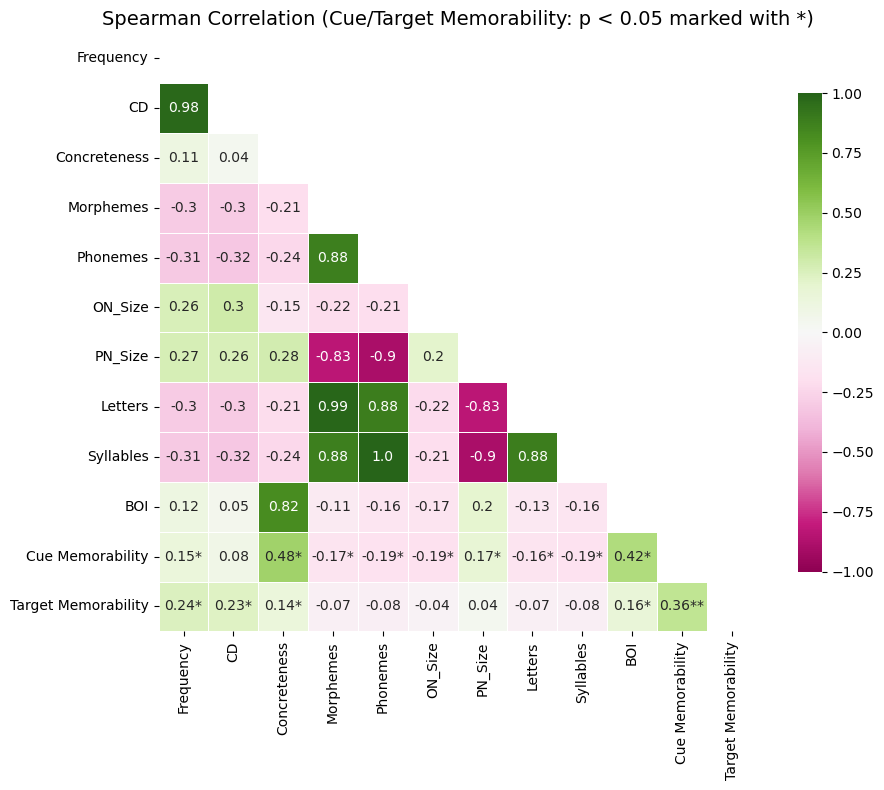

In [42]:
# Drop 'Word' column
data = merged_df.drop(columns=['Word'])

# Compute Spearman correlation and p-values
corr = data.corr(method='spearman')
pvals = data.corr(method=lambda x, y: spearmanr(x, y)[1])  # Get p-values using spearmanr

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Annotate only 'Cue Memorability' and 'Target Memorability' with asterisks if p < 0.05
annot = corr.round(2).astype(str)
for target_col in ['Cue Memorability', 'Target Memorability']:
    for col in corr.columns:
        if col != target_col and pvals.loc[col, target_col] < 0.05:
            annot.loc[col, target_col] += '*'
            annot.loc[target_col, col] += '*'  # Mirror for symmetry

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=annot,
    fmt='',
    cmap='PiYG',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Spearman Correlation (Cue/Target Memorability: p < 0.05 marked with *)", fontsize=14)
plt.tight_layout()
plt.show()

In [30]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-v0_8-paper', **kwargs):
        # print(plt.style.available)
        # GH#9157
        if plot_context not in plt.style.available:
            plot_context = 'default'
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

In [44]:
merged_df.columns

Index(['Word', 'Frequency', 'CD', 'Concreteness', 'Morphemes', 'Phonemes',
       'ON_Size', 'PN_Size', 'Letters', 'Syllables', 'BOI', 'Cue Memorability',
       'Target Memorability'],
      dtype='object')

In [46]:
import statsmodels.formula.api as smf

# Regression for Cue Memorability
res_cue = smf.ols(
    formula="Q('Cue Memorability') ~ Frequency + CD + Concreteness + Morphemes + ON_Size + PN_Size + BOI + Phonemes + Letters + Syllables",
    data=merged_df
).fit()

# Regression for Target Memorability
res_target = smf.ols(
    formula="Q('Target Memorability') ~ Frequency + CD + Concreteness + Morphemes + ON_Size + PN_Size + BOI + Phonemes + Letters + Syllables",
    data=merged_df
).fit()

In [47]:
cls_cue = LinearRegDiagnostic(res_cue)
cls_target = LinearRegDiagnostic(res_target)

In [48]:

cls_cue.vif_table()

c:\Users\ANUSKA MAITY\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF Factor
5,ON_Size,1.21
6,PN_Size,1.97
3,Concreteness,2.75
7,BOI,2.77
1,Frequency,3.38
2,CD,3.72
4,Morphemes,41.83
9,Letters,42.95
0,Intercept,56.58
8,Phonemes,inf


In [49]:
cls_target.vif_table()

c:\Users\ANUSKA MAITY\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF Factor
5,ON_Size,1.21
6,PN_Size,1.97
3,Concreteness,2.75
7,BOI,2.77
1,Frequency,3.38
2,CD,3.72
4,Morphemes,41.83
9,Letters,42.95
0,Intercept,56.58
8,Phonemes,inf


CUE VIF(after removing WF)

In [52]:
import statsmodels.api as sm

# Remove highest VIF variable (Phonemes) from formula
new_formula = "Q('Cue Memorability') ~ CD + Concreteness + Morphemes + ON_Size + PN_Size + BOI"

# Create new model without the high VIF variable
new_cue_model = sm.formula.ols(new_formula, data=merged_df).fit()

# Check new model's VIF
new_cls_cue = LinearRegDiagnostic(new_cue_model)
new_cls_cue.vif_table()

,Features,VIF Factor
4,ON_Size,1.18
1,CD,1.18
5,PN_Size,1.75
3,Morphemes,1.77
2,Concreteness,2.74
6,BOI,2.77
0,Intercept,51.46


TARGET VIF(after removing WF)

In [53]:
# Remove highest VIF variable (Phonemes) from formula
new_formula = "Q('Target Memorability') ~ CD + Concreteness + Morphemes + ON_Size + PN_Size + BOI"

# Create new model without the high VIF variable
new_target_model = sm.formula.ols(new_formula, data=merged_df).fit()

# Check new model's VIF
new_cls_target = LinearRegDiagnostic(new_cue_model)
new_cls_target.vif_table()

,Features,VIF Factor
4,ON_Size,1.18
1,CD,1.18
5,PN_Size,1.75
3,Morphemes,1.77
2,Concreteness,2.74
6,BOI,2.77
0,Intercept,51.46


OLS CUE

In [54]:
# Get the summary
summary = new_cue_model.summary()
print(summary)

# Print significant predictors with asterisks
print("\nSignificant predictors:")
for var in new_cue_model.pvalues.index:
    pval = new_cue_model.pvalues[var]
    stars = ""
    if pval < 0.001:
        stars = "***"
    elif pval < 0.01:
        stars = "**"
    elif pval < 0.05:
        stars = "*"
    
    if stars:  # Only print if significant
        print(f"{var}: {stars} (p = {pval:.4f})")

print("\nSignificance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05")

                              OLS Regression Results                             
Dep. Variable:     Q('Cue Memorability')   R-squared:                       0.281
Model:                               OLS   Adj. R-squared:                  0.270
Method:                    Least Squares   F-statistic:                     26.45
Date:                   Wed, 16 Apr 2025   Prob (F-statistic):           1.36e-26
Time:                           16:53:51   Log-Likelihood:                 294.89
No. Observations:                    414   AIC:                            -575.8
Df Residuals:                        407   BIC:                            -547.6
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0

OLS TARGET

In [55]:
# Get the summary
summary = new_target_model.summary()
print(summary)

# Print significant predictors with asterisks
print("\nSignificant predictors:")
for var in new_target_model.pvalues.index:
    pval = new_target_model.pvalues[var]
    stars = ""
    if pval < 0.001:
        stars = "***"
    elif pval < 0.01:
        stars = "**"
    elif pval < 0.05:
        stars = "*"
    
    if stars:  # Only print if significant
        print(f"{var}: {stars} (p = {pval:.4f})")

print("\nSignificance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05")

                               OLS Regression Results                               
Dep. Variable:     Q('Target Memorability')   R-squared:                       0.072
Model:                                  OLS   Adj. R-squared:                  0.058
Method:                       Least Squares   F-statistic:                     5.231
Date:                      Wed, 16 Apr 2025   Prob (F-statistic):           3.32e-05
Time:                              16:54:43   Log-Likelihood:                 340.30
No. Observations:                       414   AIC:                            -666.6
Df Residuals:                           407   BIC:                            -638.4
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------